In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import datetime
%matplotlib inline

**IMPORT RAW DATA**

In [2]:
# Read the Data
df = pd.read_csv("https://raw.githubusercontent.com/bahau88/G2Elab-Energy-Building-/main/dataset/tmp-168294341854632.csv")

# convert the 'DTSTART' and 'DTEND' columns to datetime format
df['DTSTART'] = pd.to_datetime(df['DTSTART'])
df['DTEND'] = pd.to_datetime(df['DTEND'])

# extract the date and time components from the 'DTSTART' column
df['DATE'] = df['DTSTART'].dt.date
df['START-TIME'] = df['DTSTART'].dt.strftime('%H:%M')

# extract the date and time components from the 'DTSTART' column
df['DATE2'] = df['DTEND'].dt.date
df['END-TIME'] = df['DTEND'].dt.strftime('%H:%M')

df.head(10)


,SUMMARY,DTSTART,DTEND,DUE,NOTES,ATTENDEE,LOCATION,PRIORITY,URL,CALENDAR,UID,ORGANIZER,CATEGORIES,DURATION,REPLACES RECURRENT EVENT FROM,DATE,START-TIME,DATE2,END-TIME
0,RDV et inscriptions étudiants internationaux,2020-08-24 08:00:00,2020-08-24 18:00:00,NaN,(Exporté le:23/03/2023 17:56),NaN,G-1B016-Projet-Vie étudiante,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-24,08:00,2020-08-24,18:00
1,DS THERMO HYDRAULIQUE MONOPHASIQUE,2020-08-24 08:30:00,2020-08-24 11:30:00,NaN,1A-ETU(Exporté le:23/03/2023 17:56),NaN,G-1C002-Amphi Coulomb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-24,08:30,2020-08-24,11:30
2,Examen Génie Elect,2020-08-24 09:00:00,2020-08-24 11:00:00,NaN,1A-ALT(Exporté le:23/03/2023 17:56),NaN,G-4D006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-24,09:00,2020-08-24,11:00
3,Examen tiers temps,2020-08-24 11:00:00,2020-08-24 12:00:00,NaN,(Exporté le:23/03/2023 17:56),NaN,G-4D006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-24,11:00,2020-08-24,12:00
4,DS APP IEE,2020-08-24 13:00:00,2020-08-24 14:00:00,NaN,1A-ETU-A1a(Exporté le:23/03/2023 17:56),NaN,G-2C005-info,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-24,13:00,2020-08-24,14:00
5,DS APPROFONDISSEMENT orientés FILIERES,2020-08-24 13:00:00,2020-08-24 16:00:00,NaN,1A-ETU(Exporté le:23/03/2023 17:56),NaN,G-2C006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-24,13:00,2020-08-24,16:00
6,RDV et inscriptions étudiants internationaux,2020-08-25 08:00:00,2020-08-25 18:00:00,NaN,(Exporté le:23/03/2023 17:56),NaN,G-1B016-Projet-Vie étudiante,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-25,08:00,2020-08-25,18:00
7,DS MECANIQUE DES SOLIDES DEFORMABLES,2020-08-25 08:30:00,2020-08-25 11:30:00,NaN,1A-ETU(Exporté le:23/03/2023 17:56),NaN,G-1C002-Amphi Coulomb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-25,08:30,2020-08-25,11:30
8,Examen Fond maths,2020-08-25 09:00:00,2020-08-25 11:00:00,NaN,1A-ALT(Exporté le:23/03/2023 17:56),NaN,G-4D006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-25,09:00,2020-08-25,11:00
9,Examen tiers temps,2020-08-25 11:00:00,2020-08-25 12:00:00,NaN,(Exporté le:23/03/2023 17:56),NaN,G-4D006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-25,11:00,2020-08-25,12:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5208 entries, 0 to 5207
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   SUMMARY                        5208 non-null   object        
 1   DTSTART                        5208 non-null   datetime64[ns]
 2   DTEND                          5208 non-null   datetime64[ns]
 3   DUE                            0 non-null      float64       
 4   NOTES                          5208 non-null   object        
 5   ATTENDEE                       0 non-null      float64       
 6   LOCATION                       5208 non-null   object        
 7   PRIORITY                       0 non-null      float64       
 8   URL                            0 non-null      float64       
 9   CALENDAR                       0 non-null      float64       
 10  UID                            0 non-null      float64       
 11  ORGANIZER        

In [4]:
# data cleaning, remove the unnecessary columns
df = df.drop(['SUMMARY',	'DUE',	'NOTES',	'ATTENDEE'	,'PRIORITY',	'URL'	,'CALENDAR'	,'UID',	'ORGANIZER',	'CATEGORIES',	'DURATION',	'REPLACES RECURRENT EVENT FROM', 'DTSTART', 'DTEND', 'DATE2'], axis=1)
df.head(5)

,LOCATION,DATE,START-TIME,END-TIME
0,G-1B016-Projet-Vie étudiante,2020-08-24,08:00,18:00
1,G-1C002-Amphi Coulomb,2020-08-24,08:30,11:30
2,G-4D006,2020-08-24,09:00,11:00
3,G-4D006,2020-08-24,11:00,12:00
4,G-2C005-info,2020-08-24,13:00,14:00


In [5]:
# Rearrange the columns
df = df[['DATE', 'START-TIME', 'END-TIME', 'LOCATION']]
df.head(5)

,DATE,START-TIME,END-TIME,LOCATION
0,2020-08-24,08:00,18:00,G-1B016-Projet-Vie étudiante
1,2020-08-24,08:30,11:30,G-1C002-Amphi Coulomb
2,2020-08-24,09:00,11:00,G-4D006
3,2020-08-24,11:00,12:00,G-4D006
4,2020-08-24,13:00,14:00,G-2C005-info


In [6]:
# convert the start_time and end_time columns to datetime objects
start_times = pd.to_datetime(df['START-TIME'], format='%H:%M')
end_times = pd.to_datetime(df['END-TIME'], format='%H:%M')

# calculate the duration between start_time and end_time
durations = (end_times - start_times).dt.total_seconds() / 3600

# add the duration column to the dataframe
df['DURATION'] = durations

#re order the position of column
df = df.reindex(columns=['DATE', 'START-TIME', 'END-TIME', 'DURATION', 'LOCATION'])
df.head(20)

# print the modified dataframe
df.head(5)


,DATE,START-TIME,END-TIME,DURATION,LOCATION
0,2020-08-24,08:00,18:00,10.0,G-1B016-Projet-Vie étudiante
1,2020-08-24,08:30,11:30,3.0,G-1C002-Amphi Coulomb
2,2020-08-24,09:00,11:00,2.0,G-4D006
3,2020-08-24,11:00,12:00,1.0,G-4D006
4,2020-08-24,13:00,14:00,1.0,G-2C005-info


In [7]:
# define a function to count the number of components containing 'G-', the componnets which contain other characters in not counted for example (,*)
def count_g_components(row):
    components = row.split(',')
    return sum(['G-' in component for component in components])

# add a new column to the dataframe with the G- component count
df['NUMBER OF ROOMS'] = df['LOCATION'].apply(count_g_components)

# print the modified dataframe
df.tail(30)

,DATE,START-TIME,END-TIME,DURATION,LOCATION,NUMBER OF ROOMS
5178,2021-07-06,08:00,12:30,4.50,G-1D003-Salle du Conseil,1
5179,2021-07-06,08:00,18:00,10.00,G-2B010,1
5180,2021-07-07,08:00,18:00,10.00,G-2B010,1
5181,2021-07-07,08:00,12:00,4.00,G-2A003,1
5182,2021-07-07,08:00,19:00,11.00,G-2B009,1
5183,2021-07-07,09:00,12:00,3.00,G-2C001,1
5184,2021-07-07,13:30,16:00,2.50,G-0B007-Amphi Bergès,1
5185,2021-07-08,08:00,18:00,10.00,G-1A002-Amphi Ampère,1
5186,2021-07-08,08:00,18:00,10.00,G-2B010,1
5187,2021-07-08,09:00,11:00,2.00,G-2A006,1


In [8]:
# Create column that shows the total duration (duration x number of rooms)
df['TOTAL DURATION'] = df['DURATION'] * df['NUMBER OF ROOMS']

# multiply the component count by 15 (max people) to create a new column
df['MAX PEOPLE'] = df['NUMBER OF ROOMS'].apply(lambda x: x * 15)

#df = df.drop(['date'], axis=1)
df.head(10)

,DATE,START-TIME,END-TIME,DURATION,LOCATION,NUMBER OF ROOMS,TOTAL DURATION,MAX PEOPLE
0,2020-08-24,08:00,18:00,10.0,G-1B016-Projet-Vie étudiante,1,10.0,15
1,2020-08-24,08:30,11:30,3.0,G-1C002-Amphi Coulomb,1,3.0,15
2,2020-08-24,09:00,11:00,2.0,G-4D006,1,2.0,15
3,2020-08-24,11:00,12:00,1.0,G-4D006,1,1.0,15
4,2020-08-24,13:00,14:00,1.0,G-2C005-info,1,1.0,15
5,2020-08-24,13:00,16:00,3.0,G-2C006,1,3.0,15
6,2020-08-25,08:00,18:00,10.0,G-1B016-Projet-Vie étudiante,1,10.0,15
7,2020-08-25,08:30,11:30,3.0,G-1C002-Amphi Coulomb,1,3.0,15
8,2020-08-25,09:00,11:00,2.0,G-4D006,1,2.0,15
9,2020-08-25,11:00,12:00,1.0,G-4D006,1,1.0,15


**Plotting**

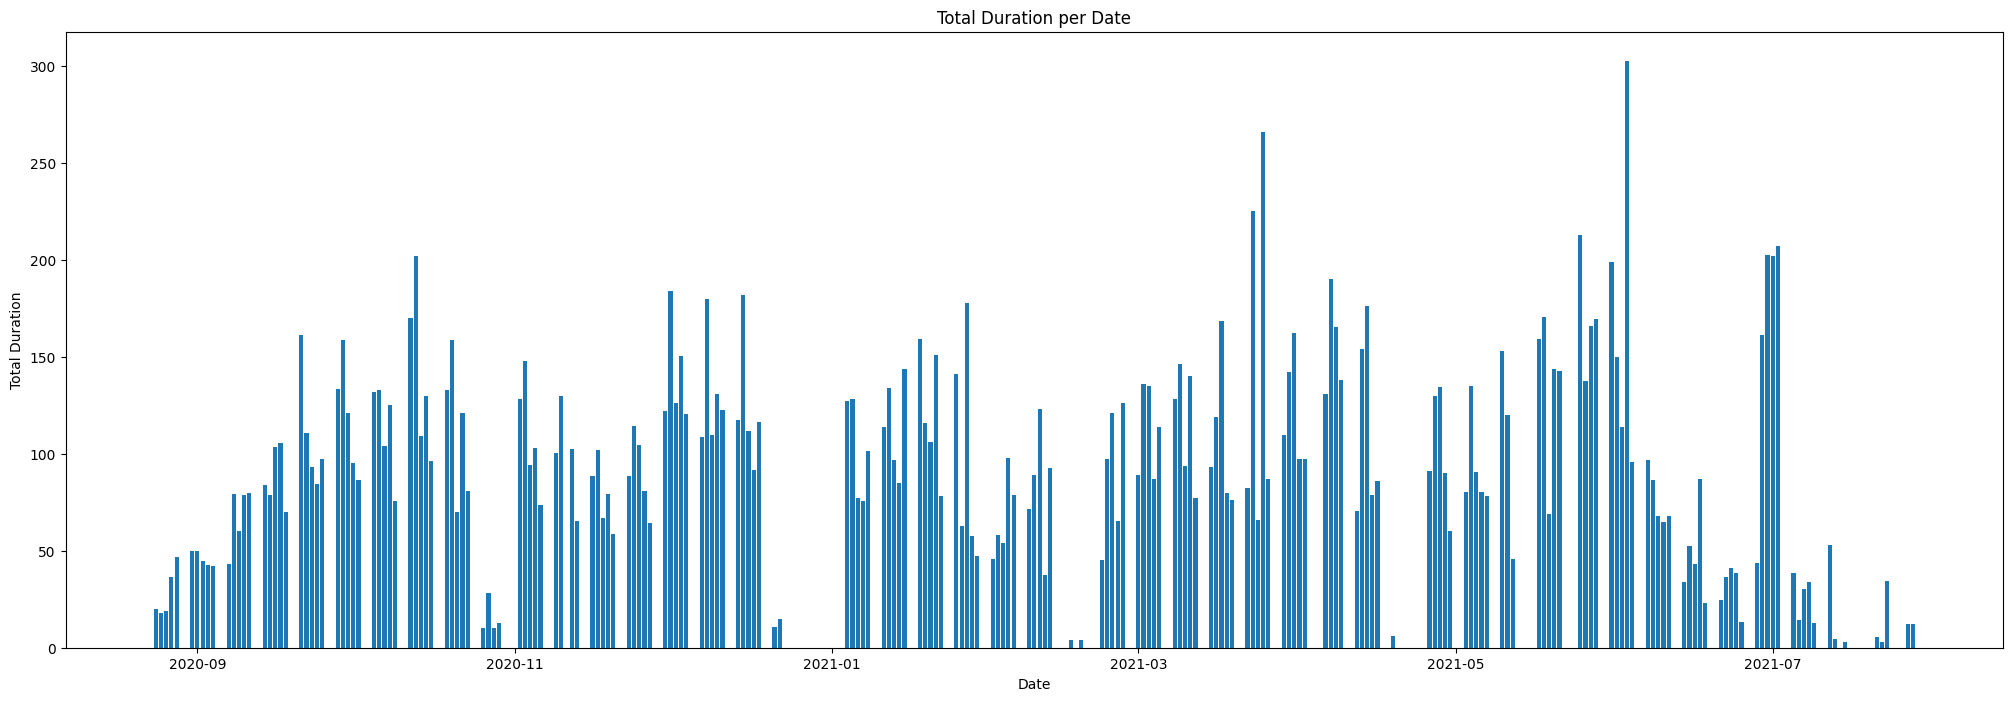

In [9]:
import matplotlib.pyplot as plt
# Convert date column to datetime object
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')

# Group the data by date and sum the total duration
agg_df = df.groupby('DATE')['TOTAL DURATION'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(25, 8))
plt.bar(agg_df['DATE'], agg_df['TOTAL DURATION'])
plt.xlabel('Date')
plt.ylabel('Total Duration')
plt.title('Total Duration per Date')
plt.show()

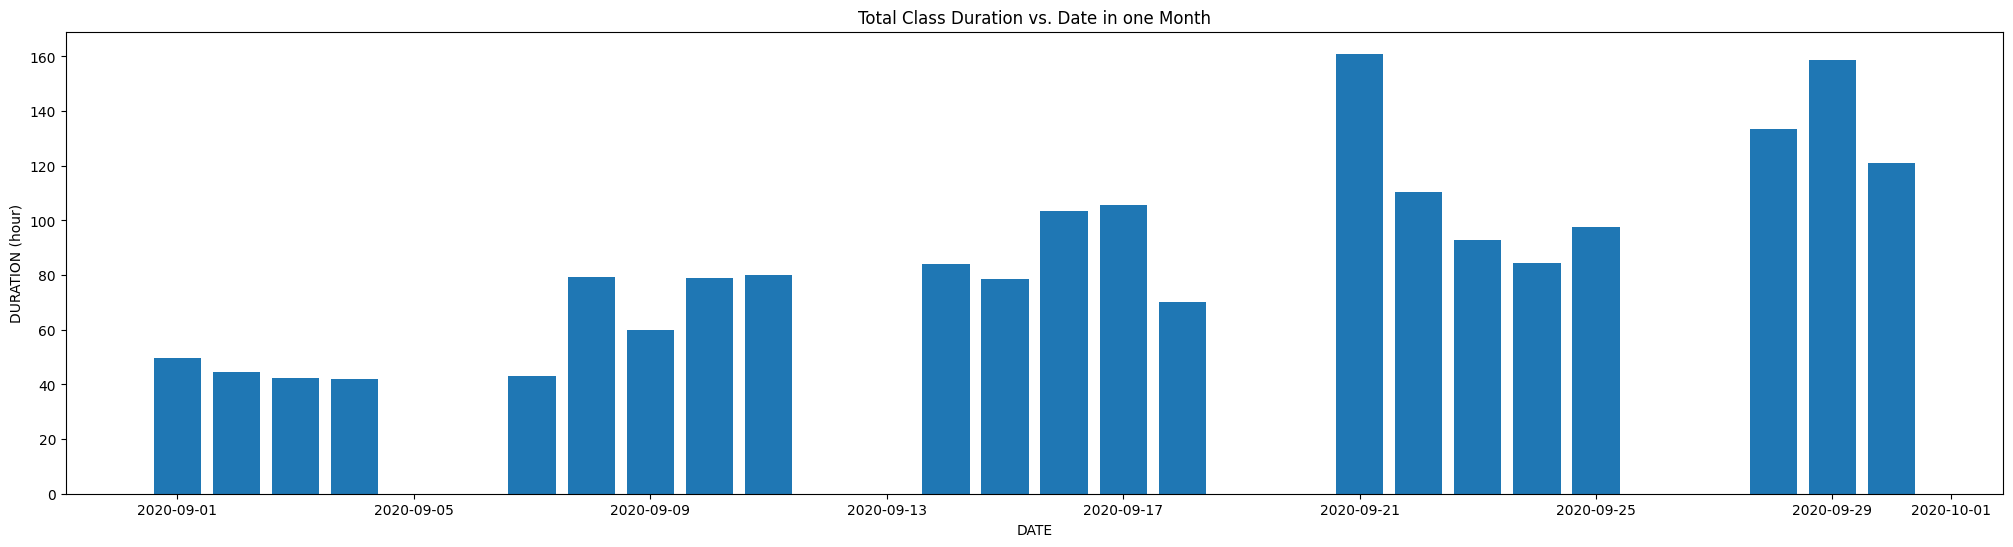

In [10]:
# convert the date column to datetime format
df['date'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')

# filter the dataframe to include only the rows between two dates
start_date = pd.to_datetime('2020-09-01', format='%Y-%m-%d')
end_date = pd.to_datetime('2020-09-30', format='%Y-%m-%d')
filtered_df = df.loc[(df['date'] >= start_date) & (df['date'] <= end_date)]

# group the filtered dataframe by date and sum the total duration for each date
grouped_df = filtered_df.groupby('date', as_index=False)['TOTAL DURATION'].sum()

# create a bar chart of the grouped dataframe
plt.figure(figsize=(25, 6))  # set the figure size to 25x6 inches
plt.bar(grouped_df['date'], grouped_df['TOTAL DURATION'])
plt.xlabel('DATE')
plt.ylabel('DURATION (hour)')
plt.title('Total Class Duration vs. Date in one Month')

plt.show()

**BREAK DOWN 1 ROW 1 LOCATION**

In [11]:
# split the rows into multiple rows and keep only the components containing 'G-'
df = df.assign(LOCATION=df['LOCATION'].str.split(',')).explode('LOCATION')
df = df[df['LOCATION'].str.contains('G-')]

df = df.drop(['NUMBER OF ROOMS', 'TOTAL DURATION', 'date', 'MAX PEOPLE', 'DURATION'], axis=1)
# print the modified dataframe
df.tail(30)

,DATE,START-TIME,END-TIME,LOCATION
5185,2021-07-08,08:00,18:00,G-1A002-Amphi Ampère
5186,2021-07-08,08:00,18:00,G-2B010
5187,2021-07-08,09:00,11:00,G-2A006
5188,2021-07-08,13:00,18:15,G-0B007-Amphi Bergès
5188,2021-07-08,13:00,18:15,G-1C003
5189,2021-07-08,14:00,15:30,G-1D003-Salle du Conseil
5190,2021-07-09,08:00,12:00,G-1A002-Amphi Ampère
5191,2021-07-09,08:30,11:30,G-1C002-Amphi Coulomb
5192,2021-07-09,09:00,12:00,G-2C001
5193,2021-07-09,13:30,16:30,G-1C002-Amphi Coulomb


**ADDITIONAL PART - BREAK DOWN INTO 1 HOUR INTERVAL**

In [12]:
# Convert start and end times to datetime objects
df['START-TIME'] = pd.to_datetime(df['START-TIME'])
df['END-TIME'] = pd.to_datetime(df['END-TIME'])

# Create a new dataframe to store the split rows
new_rows = []

# Loop through each row in the original dataset
for _, row in df.iterrows():

    # Calculate the duration between start and end times
    duration = row['END-TIME'] - row['START-TIME']

    # If the duration is less than or equal to 1 hour, add the row to the new dataframe as is
    if duration <= pd.Timedelta(hours=1):
        new_rows.append(row)

    # If the duration is more than 1 hour, split the row into multiple rows (one for each hour) and add them to the new dataframe
    else:
        for i in range(int(duration.total_seconds() / 3600)):
            new_start_time = row['START-TIME'] + pd.Timedelta(hours=i)
            new_end_time = new_start_time + pd.Timedelta(hours=1)
            new_row = {
                'DATE': row['DATE'],
                'START-TIME': new_start_time.strftime('%H:%M'),
                'END-TIME': new_end_time.strftime('%H:%M'),
                'LOCATION': row['LOCATION']
            }
            new_rows.append(new_row)

# Create a new dataframe from the list of split rows
new_df = pd.DataFrame(new_rows)

new_df['START-TIME'] = pd.to_datetime(new_df['START-TIME']).dt.strftime('%H:%M')
new_df['END-TIME'] = pd.to_datetime(new_df['END-TIME']).dt.strftime('%H:%M')


# Show the first 50 rows of the new dataframe
new_df.head(50)


,DATE,START-TIME,END-TIME,LOCATION
0,2020-08-24,08:00,09:00,G-1B016-Projet-Vie étudiante
1,2020-08-24,09:00,10:00,G-1B016-Projet-Vie étudiante
2,2020-08-24,10:00,11:00,G-1B016-Projet-Vie étudiante
3,2020-08-24,11:00,12:00,G-1B016-Projet-Vie étudiante
4,2020-08-24,12:00,13:00,G-1B016-Projet-Vie étudiante
5,2020-08-24,13:00,14:00,G-1B016-Projet-Vie étudiante
6,2020-08-24,14:00,15:00,G-1B016-Projet-Vie étudiante
7,2020-08-24,15:00,16:00,G-1B016-Projet-Vie étudiante
8,2020-08-24,16:00,17:00,G-1B016-Projet-Vie étudiante
9,2020-08-24,17:00,18:00,G-1B016-Projet-Vie étudiante


**ADD DURATION, DELETE END-DATE, ROUNDED HOUR, RENAME COLUMN**

In [13]:
import pandas as pd

# Delete the "END-TIME" column
new_df = new_df.drop("END-TIME", axis=1)

# Rename the "START-TIME" column to "Hour"
new_df = new_df.rename(columns={"START-TIME": "Hour", "DATE":"Date", "LOCATION" : "Location"})

# Add a new column "Duration" with all values set to 1
new_df["Duration"] = 1

# Rounded hour
# extract only the hour part from the Hour column, add ":00" to it, and convert it to datetime object
new_df['Hour'] = pd.to_datetime(new_df['Hour'].apply(lambda x: x.split(':')[0] + ':00'), format='%H:%M')
# extract the hour and minute parts from the datetime object and convert them back to string
new_df['Hour'] = new_df['Hour'].apply(lambda x: str(x.hour).zfill(2) + ':' + str(x.minute).zfill(2))


new_df.head(20)

,Date,Hour,Location,Duration
0,2020-08-24,08:00,G-1B016-Projet-Vie étudiante,1
1,2020-08-24,09:00,G-1B016-Projet-Vie étudiante,1
2,2020-08-24,10:00,G-1B016-Projet-Vie étudiante,1
3,2020-08-24,11:00,G-1B016-Projet-Vie étudiante,1
4,2020-08-24,12:00,G-1B016-Projet-Vie étudiante,1
5,2020-08-24,13:00,G-1B016-Projet-Vie étudiante,1
6,2020-08-24,14:00,G-1B016-Projet-Vie étudiante,1
7,2020-08-24,15:00,G-1B016-Projet-Vie étudiante,1
8,2020-08-24,16:00,G-1B016-Projet-Vie étudiante,1
9,2020-08-24,17:00,G-1B016-Projet-Vie étudiante,1


**ROOM CAPACITY**

In [14]:
#ADDING ROOM CAPACITY
# Create a new column "Capacity" with default value as -1
new_df["Capacity"] = 0

# Define a dictionary to map Location values to Capacity values
capacity_map = {"G-0B007": 150,
                "G-1A002":	150,
                "G-1C002":	150,
                "G-0B015":	30,
                "G-4D011":	30,
                "G-4D013":	30,
                "G-1B001":	50,
                "G-1B002":	10,
                "G-1B003":	10,
                "G-1B004":	10,
                "G-1B005":	10,
                "G-3A005":	16,
                "G-3A007":	16,
                "G-3A007": 16,
                "G-3A010":	5,
                "G-3A010":	5,
                "G-3A012":	16,
                "G-3B007":	16,
                "G-3B012":	16,
                "G-3B013":	16,
                "G-3C011":	16,
                "G-3B008": 16,
                "G-3C007":	16,
                "G-3D001":	16,
                "G-0B009":	16,
                "G-3D002":	54,
                "G-3D005":	16,
                "G-3D006":	16,
                "G-4A013":	16,
                "G-4C005":	16,
                "G-4C006":	16,
                "G-4C008":	16,
                "G-4C013":	16,
                "G-5D003":	16,
                "G-5D005":	16,
                "G-5D006":	16,
                "G-2A003":	80,
                "G-2A006":	80,
                "G-2B009":	80,
                "G-2B010":	80,
                "G-2C006":	80,
                "G-0B018":	221,
                "G-0D004":	826,
                "G-0D006":	100,
                "G-1C003":	10,
                "G-1C004":	14,
                "G-1D003":	40,
                "G-1D006":	10,
                "G-2A004":	29,
                "G-2A005":	29,
                "G-2B002":	36,
                "G-2B012":	36,
                "G-2B013":	36,
                "G-2C001":	36,
                "G-2C002":	36,
                "G-2C003":	36,
                "G-2C004":	36,
                "G-2C007":	36,
                "G-2C008":	36,
                "G-4D003":	36,
                "G-4D006":	34,
                "G-4D008":	36,
                "G-1B012":	18,
                "G-2A007":	22,
                "G-2B001":	18,
                "G-2C005":	18,
                "G-3A014":	18,
                "G-3B001":	18,
                "G-3D003":	18,
                "G-4A020":	18,
                "G-4C012":	18,
                "G-1B008":	10,
                "G-1B009":	12,
                "G-1B016":	10,
                "G-4D001":	12,
                "G-4D005":	12,
                "G-4D007":	12,
                "G-4D009":	12,
                "G-4D010":	12,
                }

# Loop over rows in the dataframe and set Capacity based on Location
for i, row in new_df.iterrows():
    for location, capacity in capacity_map.items():
        if location in row["Location"]:
            new_df.at[i, "Capacity"] = capacity
new_df.head(20)

,Date,Hour,Location,Duration,Capacity
0,2020-08-24,08:00,G-1B016-Projet-Vie étudiante,1,10
1,2020-08-24,09:00,G-1B016-Projet-Vie étudiante,1,10
2,2020-08-24,10:00,G-1B016-Projet-Vie étudiante,1,10
3,2020-08-24,11:00,G-1B016-Projet-Vie étudiante,1,10
4,2020-08-24,12:00,G-1B016-Projet-Vie étudiante,1,10
5,2020-08-24,13:00,G-1B016-Projet-Vie étudiante,1,10
6,2020-08-24,14:00,G-1B016-Projet-Vie étudiante,1,10
7,2020-08-24,15:00,G-1B016-Projet-Vie étudiante,1,10
8,2020-08-24,16:00,G-1B016-Projet-Vie étudiante,1,10
9,2020-08-24,17:00,G-1B016-Projet-Vie étudiante,1,10


**GROUP THE SAME HOUR AND DATE, SUM THE DURATION AND ROOM CAPACITY**

In [15]:
import pandas as pd

# group by Date and Hour and aggregate the other columns
grouped_df = new_df.groupby(['Date', 'Hour']).agg({
    'Location': lambda x: ', '.join(x),
    'Duration': 'sum',
    'Capacity': 'sum'
}).reset_index()

# print the grouped DataFrame
grouped_df.head(20)


,Date,Hour,Location,Duration,Capacity
0,2020-08-24,08:00,"G-1B016-Projet-Vie étudiante, G-1C002-Amphi Co...",2,160
1,2020-08-24,09:00,"G-1B016-Projet-Vie étudiante, G-1C002-Amphi Co...",3,194
2,2020-08-24,10:00,"G-1B016-Projet-Vie étudiante, G-1C002-Amphi Co...",3,194
3,2020-08-24,11:00,"G-1B016-Projet-Vie étudiante, G-4D006",2,44
4,2020-08-24,12:00,G-1B016-Projet-Vie étudiante,1,10
5,2020-08-24,13:00,"G-1B016-Projet-Vie étudiante, G-2C005-info, G-...",3,108
6,2020-08-24,14:00,"G-1B016-Projet-Vie étudiante, G-2C006",2,90
7,2020-08-24,15:00,"G-1B016-Projet-Vie étudiante, G-2C006",2,90
8,2020-08-24,16:00,G-1B016-Projet-Vie étudiante,1,10
9,2020-08-24,17:00,G-1B016-Projet-Vie étudiante,1,10


**DOWNLOAD THE DATASET**

In [16]:
from google.colab import files

#Save the new dataframe as a CSV file
grouped_df.to_csv('class_schedule2020-2021.csv', index=False)

#Download the CSV file to your local machine
files.download('class_schedule2020-2021.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>